1. Title
2. Introduction:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question
3. Methods & Results:
- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
- loads data from the original source on the web 
- wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 

note: all tables and figure should have a figure/table number and a legend

4. Discussion:
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?
5. References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.

## **Title**

## **Introduction**

## **Methods and Results**

In [4]:
library(tidyverse)
library(tidymodels)
library(repr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [5]:
wine_data <- read_csv2("https://raw.githubusercontent.com/choialice707/DSCI-100-Group56-Proj/main/winequality-red.csv") |>
    mutate(quality = as_factor(quality)) |>
    filter(alcohol < 150) |>
        mutate(`volatile acidity` = as.numeric(`volatile acidity`),
                `citric acid` = as.numeric(`citric acid`),
                chlorides = as.numeric(chlorides),
                density = as.numeric(density),
                sulphates = as.numeric(sulphates))
head(wine_data)
tail(wine_data)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
68,0.620,0.08,19,0.068,28,38,0.99651,342,0.82,95,6
62,0.600,0.08,2,0.090,32,44,0.99490,345,0.58,105,5
59,0.550,0.10,22,0.062,39,51,0.99512,352,0.76,112,6
63,0.510,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.310,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


In [7]:
set.seed(1234)

wine_split <- initial_split(wine_data, prop = 0.75 , strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)

head(wine_train)
head(wine_test)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.880,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.760,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
74,0.700,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
67,0.580,0.08,18,0.097,15,65,0.9959,328,0.54,92,5
56,0.615,0.00,16,0.089,16,59,0.9943,358,0.52,99,5


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5
79,0.60,0.06,16,0.069,15,59,0.9964,33,0.46,94,5
78,0.58,0.02,2,0.073,9,18,0.9968,336,0.57,95,7
75,0.50,0.36,61,0.071,17,102,0.9978,335,0.80,105,5
75,0.50,0.36,61,0.071,17,102,0.9978,335,0.80,105,5


In [19]:
wine_summary <- wine_train |>
    group_by(quality) |>
    summarize(count_per_quality = n()) 

wine_summary

quality,count_per_quality
<fct>,<int>
3,9
4,37
5,509
6,470
7,149
8,13


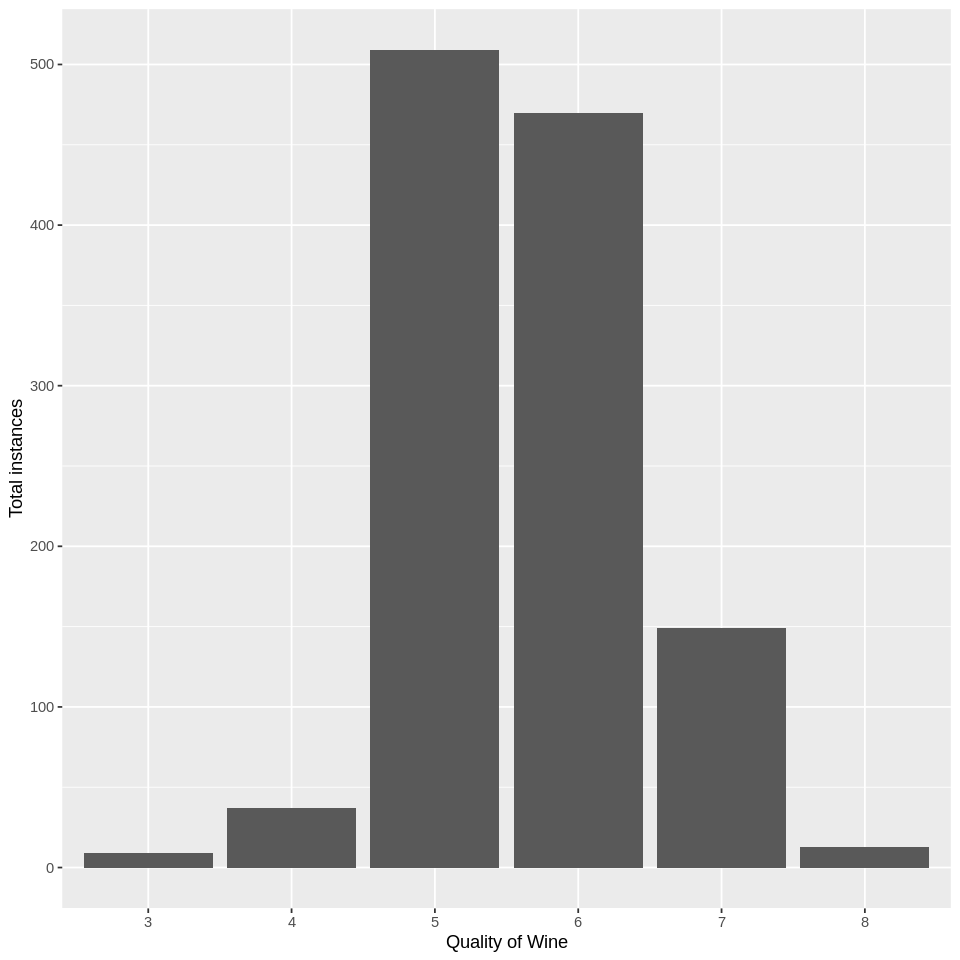

In [21]:
options(repr.plot.width = 8, repr.plot.height = 8) 

wine_summary_plot <- wine_summary |>
    ggplot(aes(x = quality, y = count_per_quality)) +
    geom_bar(stat = "identity") +
    labs(x = "Quality of Wine", y = "Total instances")
    
wine_summary_plot

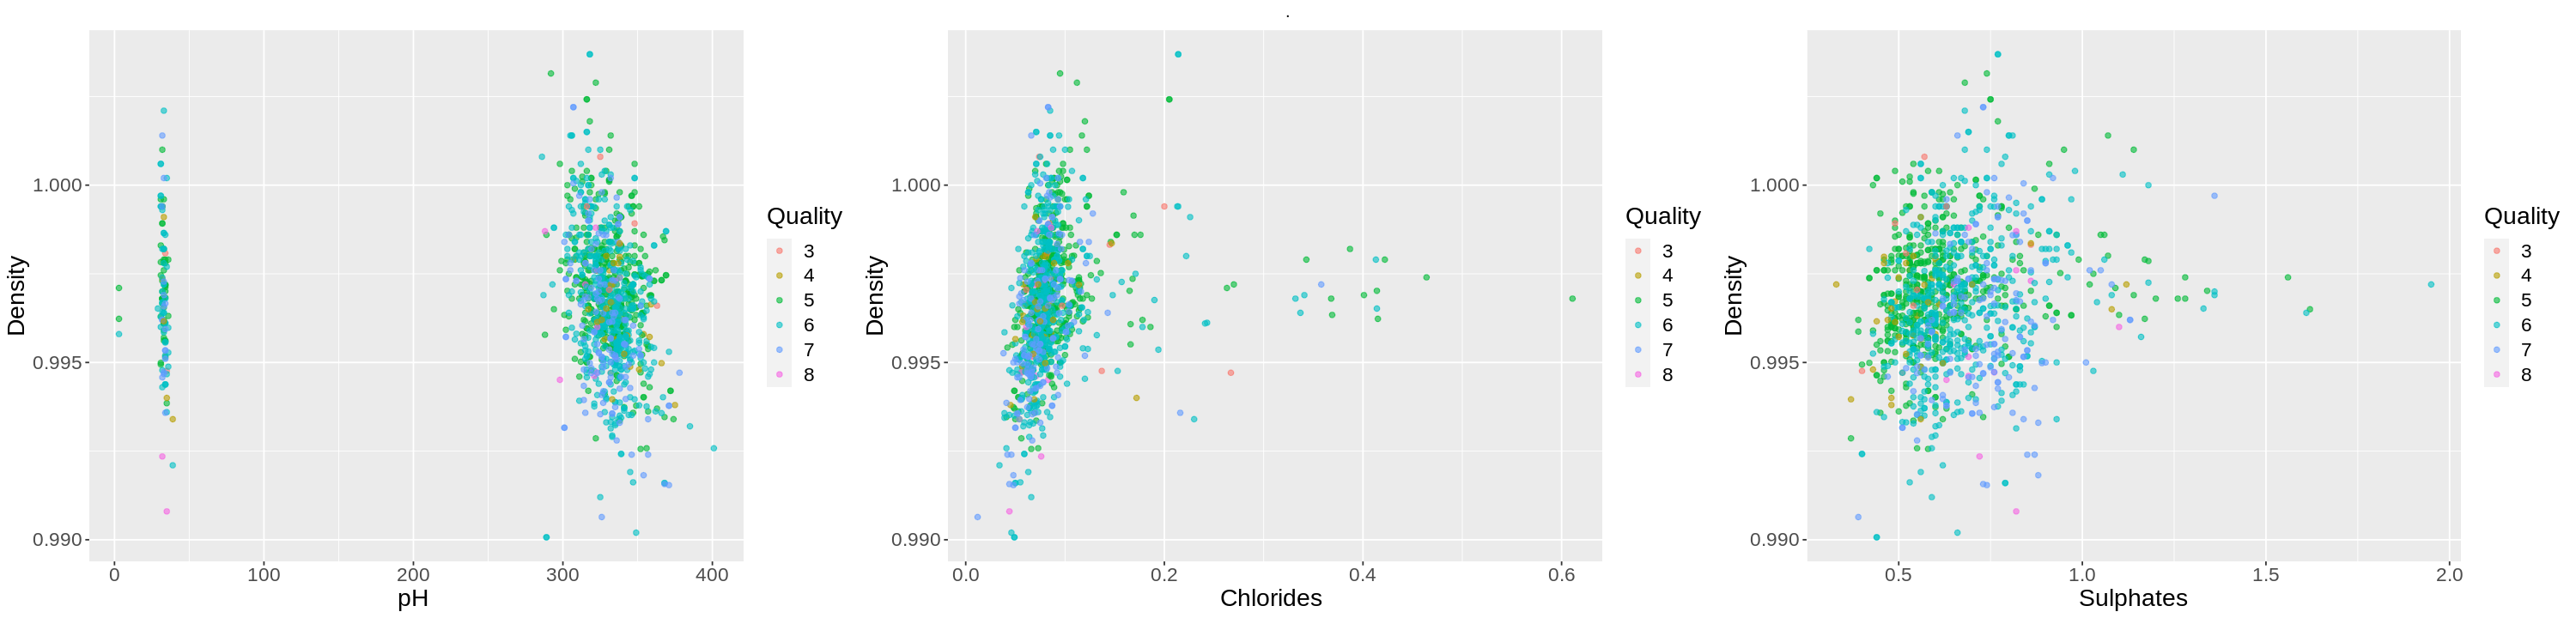

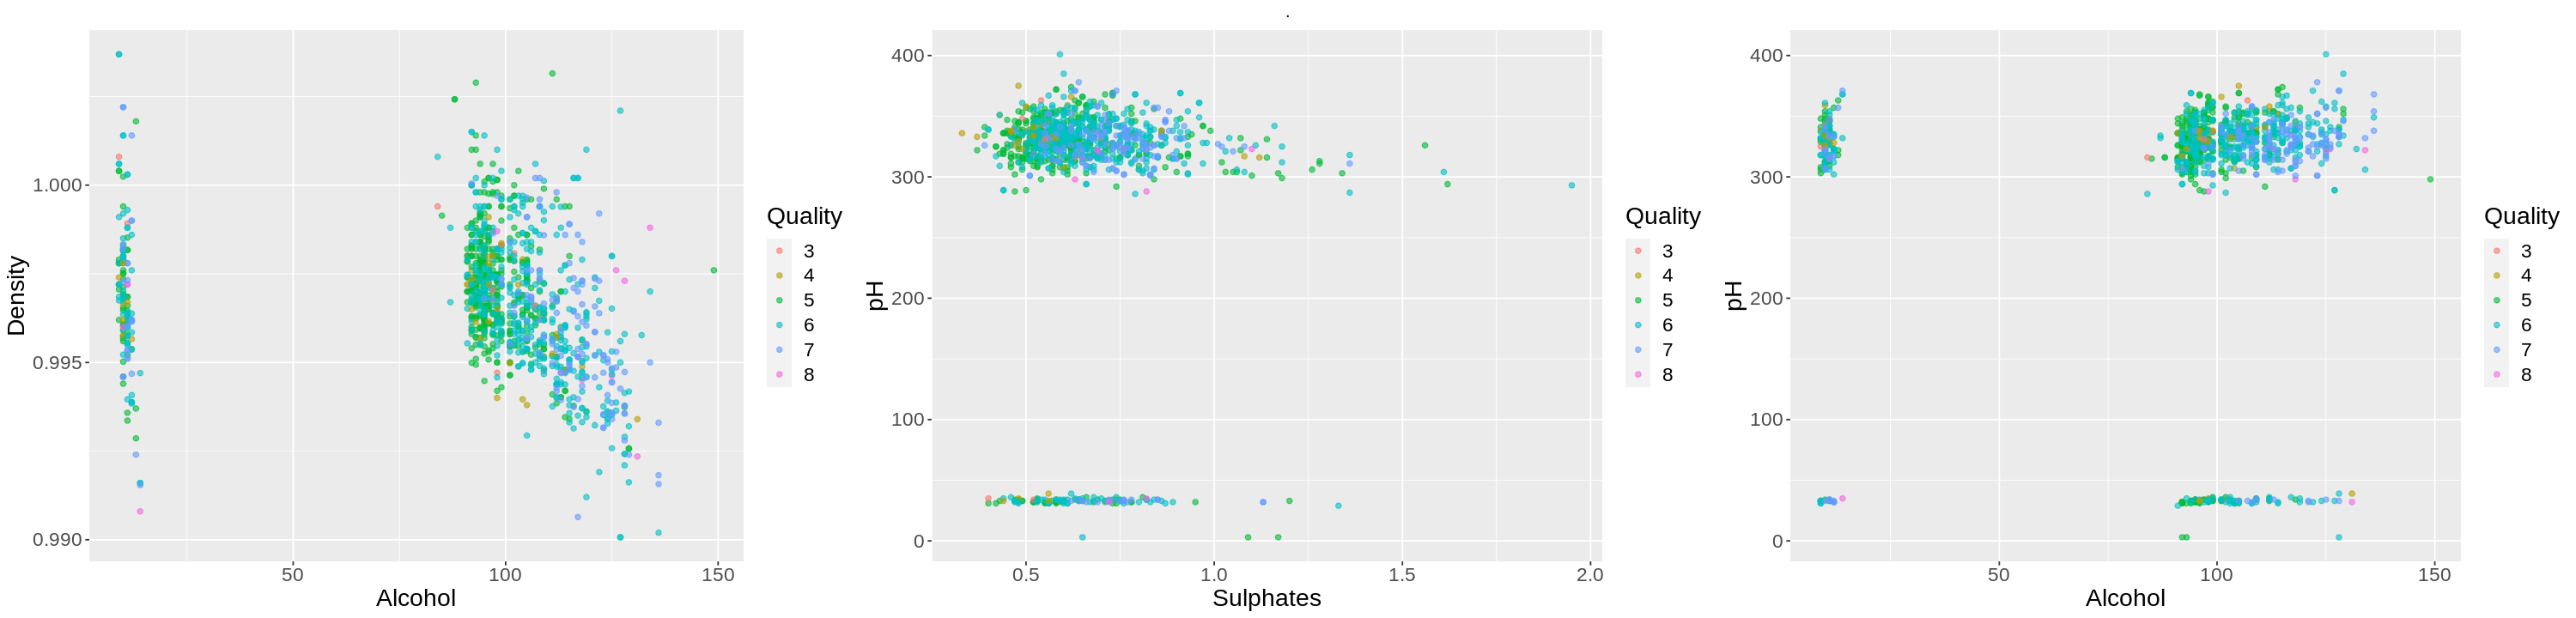

In [22]:
library(gridExtra)
options(repr.plot.width = 25, repr.plot.height = 6) 

wine_plot1 <- wine_train |>
  ggplot(aes(x = pH, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "pH ", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 17))

wine_plot2 <- wine_train |>
  ggplot(aes(x = chlorides, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Chlorides ", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 17))

wine_plot3 <- wine_train |>
  ggplot(aes(x = sulphates, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 17))

wine_plot4 <- wine_train |>
  ggplot(aes(x = alcohol, y = density, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "Density",
       color = "Quality") +
  theme(text = element_text(size = 17))

wine_plot5 <- wine_train |>
  ggplot(aes(x = sulphates, y = pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Sulphates", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 17))

wine_plot6 <- wine_train |>
  ggplot(aes(x = alcohol, y = pH, color = quality)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol", 
       y = "pH",
       color = "Quality") +
  theme(text = element_text(size = 17))

grid.arrange(wine_plot1, wine_plot2, wine_plot3, nrow = 1, top = '.')
grid.arrange(wine_plot4, wine_plot5, wine_plot6, nrow = 1, top = '.')
     

## **Discussion**

Include that we tried to balance the data because it was imbalanced (for example there were only 10 of quality 3 and ~600 for 5 and 6) but the themis package wouldnt load. In order  to improve our accuracy we would do the balancing step with the step_upsample function.

## **References**